## Commets from reviewer

<span style="color:green"> Hi! Congratulations on your first project :)I did a very good job! I really enjoyed your project overall, your code and your conclusions. I left my comments in the Markdown cells with green text. You don't need to make any adjustments, just wanted to share some of my thoughts with you. Good luck with the next one! :) </span>

## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/credit_scoring_eng.csv')
print(df.info())

for col in df.columns:
    print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
-986.927316     1
-7026.359174    1
-4236.274243    1
-6620.396473    1
-1238.560080    1
               ..
-2849.351119    1
-5619.328204    1
-448.829898     1
-1687.038672    1
-582.53841

### Conclusion

The csv file contains 12 columns of different data types, straight away we can see that columns 'days_employed', 'total_income' are missing 21525 - 19351 rows.

                ### Columns.value_counts() --> warning flags: ####
1) column - children: 47 instances of -1 and 76 instances of 20 /
2) column - days_employed: lots of negative data 
3) column - dob_years: 101 instance of 0 years
4) column - education: need to lowercase then easy to group
5) column - purpose: need to lemmatize

<span style="color:green"> Nice first look at the data!

### Step 2. Data preprocessing

### Processing missing values

In [71]:
import pandas as pd
df = pd.read_csv('/datasets/credit_scoring_eng.csv')


# 1) Id columns that have missing values --> days_employed 2174 and total_income 2174
print(df.isnull().sum())

# 2) deal with days employed 

# --> first lets get rid of negative values, they will be replaced by a median value 
#    of the "cleaned" 'days_employed' employed column, also all empty values will be replaces by a median too
# print(df['days_employed'])
# write a function that gets rid of all negatives and empty values and then calculates statistics for that column

# df_min = df[df['days_employed'] > 0]
# print(df_min['days_employed'].count())


# we can see that there are 15906 -ive values and 3445 +ive values!!, 
# at first, I replaced all the negative values with a median of all positive values but that resulted in clearly bad results
# So, I decided to replace all negative values with 0, which gave results that had trends.

# This function replaces all negative and empty values with replace_with input
def column_cleaner(col_name, replace_with):
    df_min = df[df[col_name] > 0]  # creating a column of anly +ive 'days employed'
    df_min.dropna(subset=[col_name], inplace=True)
    
    if replace_with == 'mean':
        x = int(df_min[col_name].mean()) # calculating mean of "cleaned" column
    if replace_with == 'median':
        x = int(df_min[col_name].median()) # calculating median of "cleaned" column
    if replace_with == '0':
        x = 0
        
    df.loc[(df[col_name] < 0), col_name]= x # replacing all negative values with x
    df.loc[(df[col_name] == 0), col_name]= x # replacing all 0 valus with x
    df[col_name] = df[col_name].fillna(x) # replacing all empty values with x
    return df

column_cleaner('days_employed', '0')


# 3) deal with total income

# --> we can use the column cleaner function here as well since deleting negative incomes (if they exist) is good for us

column_cleaner('total_income', 'median')


# 4) deal with children

# print(df['children'].value_counts())

children_good = df[(df['children'] > 0) & (df['children'] != 20)]  # creating a column of children without -1 and 20

med_children = int(children_good['children'].median())
df.loc[(df['children'] < 0), 'children']= med_children # replacing all negative values with +ive median
df.loc[(df['children'] == 20), 'children']= med_children # replacing all 20 children with +ive median

# print(df['children'].value_counts())


# 3) deal with column - dob_years: 101 instance of 0 years

column_cleaner('dob_years', 'median')


# 4) deal with column - education: need to lowercase then easy to group
df['education'] = df['education'].str.lower()


# 5) deal with column - gender: remove that XNA odd value
df = df[df['gender'] != 'XNA']


print(df.isnull().sum())


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64
children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Conclusion

Created a function that replaces negative and missing values with a specified parameter. The two columns with missing values are total income and days employed. They may be missing for several reasons:
1) total income is not known due to person not working 
2) total income is not known due to being self-employed / seasonal worker - hard to estimate total income
3) days employed is not known due to person being unemployed
4) days employed is not known due to person being part time/seaonal worker
3) days employed is not known due to person being in education for most of his life (PhD + PostDoc).





<span style="color:green"> This is definitely one of the most complex preprocessing I've ever seen in this project! Great Job. Here are some notes (Just my thoughts that I wanna share with you, you don't have to redo anything) :      
    1)for days_employed- just for fun turn them into years and see what happens :)                                     
    2) for -1 and 20 in children - I personally think it's typos and should have been 1 and 2 instead. But I like how you handled it!

### Data type replacement

In [42]:
### Replace the real number data type with the integer type.

cols = ['days_employed', 'total_income', 'children']
df[cols] = df[cols].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 15 columns):
children                  21524 non-null int64
days_employed             21524 non-null int64
dob_years                 21524 non-null int64
education                 21524 non-null object
education_id              21524 non-null int64
family_status             21524 non-null object
family_status_id          21524 non-null int64
gender                    21524 non-null object
income_type               21524 non-null object
debt                      21524 non-null int64
total_income              21524 non-null int64
purpose                   21524 non-null object
purpose_lemmetised        21524 non-null object
children_category         21524 non-null object
days_employed_category    21524 non-null object
dtypes: int64(7), object(8)
memory usage: 2.6+ MB
None


### Conclusion

Changed the 3 numerical columns ['days_employed', 'total_income', 'children'] to integer type.

### Processing duplicates

In [70]:
####   Delete duplicate data. ### 

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)


df = df.drop_duplicates().reset_index(drop=True)
print(df.info())


Duplicate Rows except first occurrence based on all columns are :
       children  days_employed  dob_years            education  education_id  \
2849          0              0         41  secondary education             1   
3290          0              0         58  secondary education             1   
4182          1              0         34       masters degree             0   
4851          0              0         60  secondary education             1   
5557          0              0         58  secondary education             1   
...         ...            ...        ...                  ...           ...   
20702         0              0         64  secondary education             1   
21032         0              0         60  secondary education             1   
21132         0              0         47  secondary education             1   
21281         1              0         30       masters degree             0   
21415         0              0         54  secondary e

### Conclusion

There were not many duplicates at all and data sample is large enough to drop duplicates without any worries. Hard to say where/why duplicated came from - perhaps one person making a loan application multiple times (and for the same reasons). If the loan application is made for the same reason by the same person it is unlikely that other columns will change for that - he/she will still have the same number of kids / same education,.

<span style="color:green">Overall, nice job with preprocessing!

### Lemmatization

In [16]:
#### Find lemmas for values in the column listing reasons for taking out a loan ####

print(df['purpose'].unique())

    
def lemmitization(row):
    if 'house' in row or 'housing' in row or 'estate' in row or 'property' in row:
        return 'Estate Transactions'
    
    if 'car' in row:
        return 'Car Purchase'
    
    if 'wedding' in row:
        return 'Wedding'
    
    if 'education' in row or 'educated' in row or 'university' in row:
        return 'Education'


['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with the residential real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get asupplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'property renovation'
 'going to university']


### Conclusion

Lemmatized the unique values of the purpose column by identifying words that unite a category of interest.

### Categorizing Data

In [57]:
# categorize data by purpose


df['purpose_lemmetised'] = df['purpose'].apply(lemmitization)

print(df['purpose_lemmetised'].unique())


# we can categorize numerical data such as children, days_employed, dob years and total income

# let us categorize the 4 columns above into three categories with the following function:

def categorize(number, small, medium, quantity): 
#   The function returns the children_group according to children value
    
    if number <= small: 
        return 'small %s' % quantity
    if number <= medium: 
        return 'medium %s' % quantity
    return 'big %s' % quantity

df['children_category'] = df['children'].apply(categorize, args=(1,3,'family'))
df['days_employed_category'] = df['days_employed'].apply(categorize, args=(0, 330000, 'length of employment'))
df['dob_years_category'] = df['dob_years'].apply(categorize, args=(20, 64, 'age'))
df['total_income_category'] = df['total_income'].apply(categorize, args=(50000, 150000, 'annual income'))



['Estate Transactions' 'Car Purchase' 'Education' 'Wedding']
20667
145017.0
165157.14263148114
2265604
['big annual income' 'medium annual income' 'small annual income']


### Conclusion

Created a function that categorizes numerical data bases on the user's supplied cut off points.

<span style="color:green"> Interesting approach to lemmatization and categorization. Not what I expected, but I like it!

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

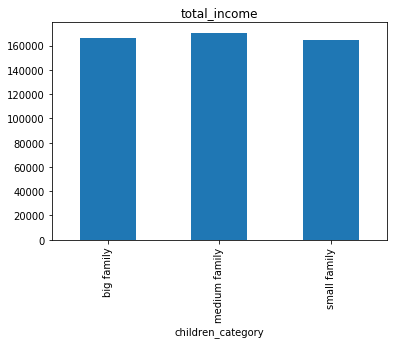

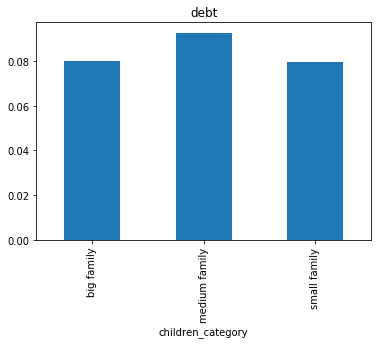

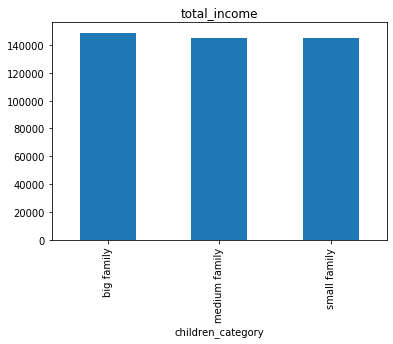

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline


columns_of_interest = ['total_income', 'debt']

for i in columns_of_interest:
    ts = df.groupby('children_category')[i].mean()
    ts.plot(kind='bar', title = i)
    plt.show()
    

ts = df.groupby('children_category')['total_income'].median()
ts.plot(kind='bar', title = 'total_income')
plt.show()




### Conclusion

First, let us assume that the two factors (that are available from the table) than influence the ability to repay the loan on time are - total income and debt. First, looking at the mean total income the picture is not clear as it appears that all 3 family sizes earn about the same, perhaps a median would tell us more as mean is distorted by a lot of rich people! Ok, so the median tells us roughly the same story although it is a bit more evident that big families (+3 kids) earn more. To me this makes sense as if you do have a big family you are probably going to have enough money to support that big family. The median total incomes for other two categories are pretty much the same. When it comes to debt, the picture becomes clearer - medium family has the highest debt ratio whilst small and big family are at a lower ratio of the same magnitude. So, to conclude - yes, having kids and the number of kids does affect the ability to repay the loan on time. The least likely (out of 3 created categories) to repay the loan on time are the medium family and big+small families are more likely to repay on time

- Is there a relation between marital status and repaying a loan on time?


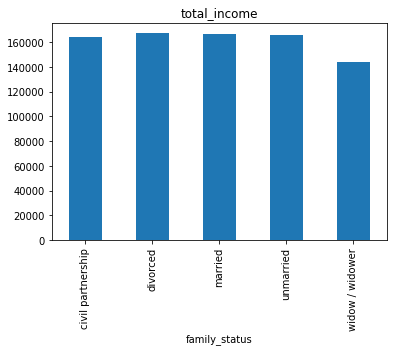

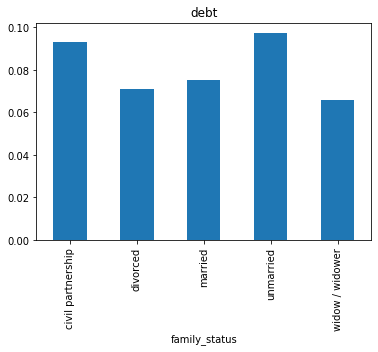

In [64]:

for i in columns_of_interest:
    ts = df.groupby('family_status')[i].mean()
    ts.plot(kind='bar', title = i)
    plt.show()

    
    


### Conclusion

Here it is a mixed picture. "Clear winners" are divorced and married categories as they have the lowest debt ratio (except the widow which at the same time has the lowest total income) and are amongst the highest earners - so they will repay the loan on time, most likely out of all other categories. Then they are followed by the civil partnership and unmarried categories as they have higher debt ratio than the two previously mentioned categories though they earn about the same. So - yes, marital status and the ability to repay the loan on time are related. Divorced and married people will repay the loan most likely, followed by all other categories - who’s likelihood of repaying on time I would place on the same level.

- Is there a relation between income level and repaying a loan on time?

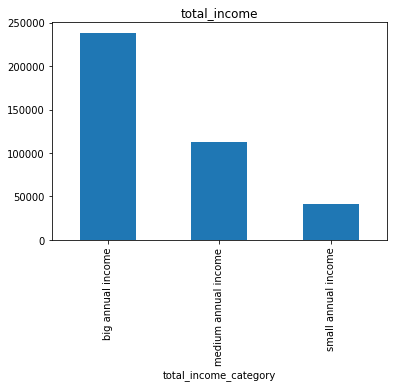

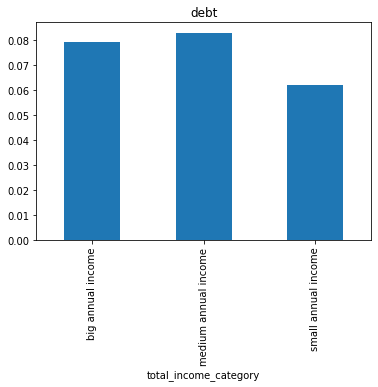

In [65]:

for i in columns_of_interest:
    ts = df.groupby('total_income_category')[i].mean()
    ts.plot(kind='bar', title = i)
    plt.show()

### Conclusion

Here, the clearest relation so far - the 3 defined categories have about the same level of debt with small income group having slightly smaller debt. Thus, it all depends on the level of income. In conclusion, the more you earn the more likely you are to repay on time. Yes, small income group has the lowest debt but the ration between income level and debt is not any better than other categories due to small income of course.

- How do different loan purposes affect on-time repayment of the loan?

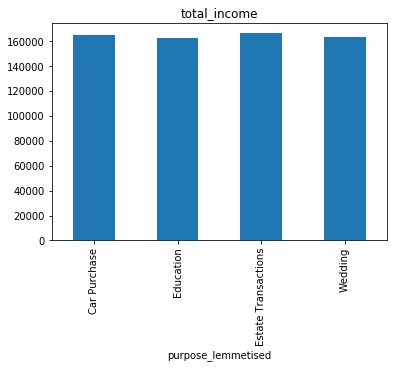

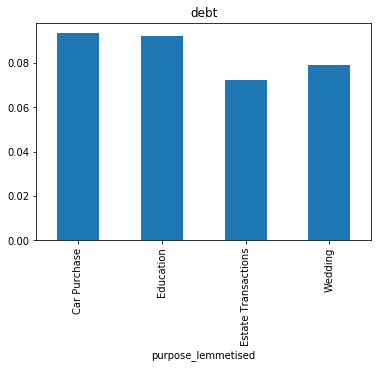

In [69]:

for i in columns_of_interest:
    ts = df.groupby('purpose_lemmetised')[i].mean()
    ts.plot(kind='bar', title = i)
    plt.show()
    

### Conclusion

The total income among all 4 categories is pretty much the same (median also does not tell us anything different) so need to decide based on debt. Here, it is clearer, people taking out loans on education and car purchase have the highest existing debt. Yes - there is relation between repaying the loan on time and reasons for taking out a loan. Those taking out a loan for wedding and estate transactions have lower existing debt ratio so are more likely to repay the loan on time as they have lower debt burden.

<span style="color:green"> Very interesting aapproach! Thanks for the graph

### Step 4. General conclusion

General Conclusion in terms least likely loan repay:
1) Medium family (1-3) kids are least likely to repay the loan on time.
2) Unmarried people and civil partnerships are least likely to repay the loan on time.
3) People with lower income are least likely to repay the loan on time even though they have lower debt than bigger earners. This is because debt/income ratio is not that much better for lower than for bigger earners.
4) The reasons for taking out a loan can give an indication whether the loan will be repaid - the reasons which will see the loan least likely to be repaid on time are car purchase and education


<span style="color:green"> Great conclusion!

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  highlighted lemmas in the values of the loan purpose column;
- [x]  the lemmatization process is described;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.